**Student Name:** Andrew Kenny

**Student ID:**   18203442

**Task: **        Making use of Numpy, write a Python class to apply the PCA transform to the provided data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.
- Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
- Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
- Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
- Store those results from your fit method that are required to transform the data set, in suitable class properties.
- Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
- For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot
- For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction

**Acknowledgements: **  
- Abhi Sinha for his suggestion on returning only the eigenvalues and eigenvectors from the fit methods so that a call to fit method returns the expected values and recommendation to give a different name my PCA class to avoid confusion

**Sources: ** 
- https://plot.ly/ipython-notebooks/principal-component-analysis/
- http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf


### **Python class to apply the PCA transform to provided data set**

In [163]:
# Import packages

import numpy as np
import random as rand
from numpy.linalg import eig
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [277]:
# Matrix class to store data

a_x = 0.05
a_y= 10

data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)), 4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

class my_PCA:
    """Class to apply PCA transformation"""
    
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, data):
        """Fit method:
        1. Find mean of each column
        2. Centres data
        3. Calculates covariance of centred matrix 
        4. Calculates calculate the eigendecomposition of the covariance
        5. Returns eigenvalues and a list of eigenvectors
        """
        mean_data = np.mean(data, axis=0)

        centred_data = data - mean_data

        cov_data = np.cov(centred_data, rowvar=False)
    
        eig_values, eig_vectors = eig(cov_data)
        return eig_values, eig_vectors
    
    def transform(self,data):
        """Transform method:
        1. Sorts eigenvectors
        2. Sorts eigenvalues
        3. Performs PCA data transformation
        """
        sorted_eigvalues_indices = eig_values.argsort()

        eigen_vectors_sorted = eig_vectors[sorted_indices, :]

        eigen_values_sorted = eig_values[sorted_indices]

        projected_data = eigen_vectors_sorted.T.dot(centred_data.T).T
        return projected_data

#Output

print("Centred data:", centred_data)
print("---------------------------------")
print("Eigen values:", eig_values)
print("---------------------------------")
print("Eigen vectors:",eig_vectors)
print("---------------------------------")
print("Sorted Eigen vectors:", eigen_vectors_sorted)
print("---------------------------------")
print("Sorted Eigen values:", eigen_values_sorted)
print("---------------------------------")
print("Transformed data:", projected_data)
print("---------------------------------")

Centred data: [[ -9.51223257 -33.40225499]
 [ -8.49373921 -35.87137308]
 [ -7.49647205 -30.9665156 ]
 [ -6.55594706 -22.89999394]
 [ -5.59485331 -20.27074622]
 [ -4.48446429 -13.67128022]
 [ -3.43849209 -15.81874503]
 [ -2.34459463  -6.72135512]
 [ -1.4949536   -4.00535977]
 [ -0.48972155   2.32445171]
 [  0.66837695   1.78396509]
 [  1.65406009   5.06264086]
 [  2.67258257   8.08715123]
 [  3.34960867  12.23816632]
 [  4.70478827  18.61984024]
 [  5.27013445  18.35236647]
 [  6.85974351  29.73172201]
 [  7.60509893  31.29582522]
 [  8.29209462  36.65459438]
 [  9.34104435  40.27689086]]
---------------------------------
Eigen values: [3.75558237e-01 5.89144358e+02]
---------------------------------
Eigen vectors: [[-0.97013378 -0.2425705 ]
 [ 0.2425705  -0.97013378]]
---------------------------------
Sorted Eigen vectors: [[-0.97013378 -0.2425705 ]
 [ 0.2425705  -0.97013378]]
---------------------------------
Sorted Eigen values: [3.75558237e-01 5.89144358e+02]
-----------------------

### **Comparison of results between Scikit Learn's fit method and own**

In [278]:
# Scikit Learn fit method (n_components=2)
pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

[[-0.23542266 -0.97189309]
 [-0.97189309  0.23542266]]


The Eigen vectors returned differs slightly from that returned by the Scikit Learn fit method:

- **Own fit method results**:
<br />[[-0.97013378 -0.2425705 ]
<br /> [ 0.2425705  -0.97013378]]


- **Scikitlearn method results**:
<br />[[ 0.24110274  0.9704996 ]
<br /> [-0.9704996   0.24110274]]
 
The values are within 0.001 in all cases but do differ slightly. Polarity and orientation also differs however this is not of high importance per this week's BBB as in both cases they refer to different directions of the same line. It should also be noted that the vectors returned by Scikitlearn are shown in rows while those returned by my own are represented in columns.

### **Comparison of results between Scikit Learn's PCA class where n_components=2 and n_components=1**

In [279]:
# Scikitlean's PCA class where n_components=2

scikit_pca_n2 = PCA(n_components=2)
scikit_pca_n2.fit(data)
scikit_pca.transform(data)

print(scikit_pca_n2.components_)

# Scikitlean's PCA class where n_components=1

scikit_pca_n1 = PCA(n_components=1)
scikit_pca_n1.fit(data)
scikit_pca_data = scikit_pca_n1.transform(data)

print(scikit_pca_n1.components_)

[[-0.23542266 -0.97189309]
 [-0.97189309  0.23542266]]
[[-0.23542266 -0.97189309]]


Results returned using Scikit Learn's PCA class differ when changing the number of components from 2 to 1. Doing so selects the eigen vector with the largest values and reduces the dimension from 2 to 1.

### **Compare the resulting dataset of own transform method with that of Scikit Learn’s transform method by plotting the points on an XY plot (n_components = 1)**

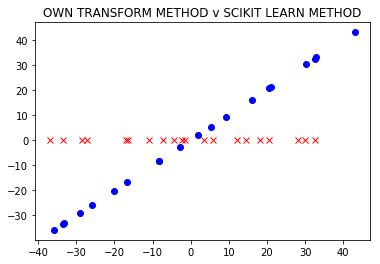

In [280]:
# Reduces dimensions of eigen vector using own PCA transform method to 1

eig_vectors_matrix = np.matrix([eigen_vectors_sorted[:,0], eigen_vectors_sorted[:,1]])
centred_data_n1 = np.dot(eig_vectors_matrix[:,1].T,centred_data.T)

# Plots results on XY Plot

plt.plot(scikit_pca_data[:], scikit_pca_data[:], 'ob')
plt.plot(centred_data_n1, np.zeros_like(centred_data_n1), 'xr')
plt.title('OWN TRANSFORM METHOD v SCIKIT LEARN METHOD')
plt.show()

**Explanation of differences**

Both methods reduce the dimension of the eigen vector to 1, selecting only that with the highest values. Both are in straight lines and have different variances.

### **Compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. (n_components = 1) **

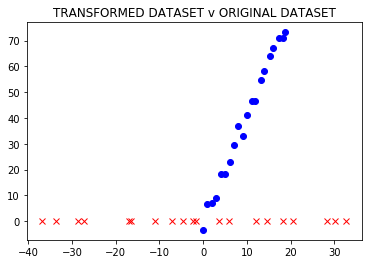

In [281]:
plt.plot(centred_data_n1, np.zeros_like(centred_data_n1), 'xr')
plt.plot(data[:,0], data[:,1], 'ob')
plt.title('TRANSFORMED DATASET v ORIGINAL DATASET')
plt.show()

**Differences between original and transformed data & explanation how PCA can be used for dimensionality reduction**

The original dataset has 2 dimensions while the transformed dataset has 1.

PCA can be used for dimensionality reduction by reducing the number of features by selecting the most important ones that still represent the entire dataset. 